## ASSIGNMENT 1

Objective:<br>
To apply data transformations and regression technique

Tasks: <br>
Write a program to process realistic business application to collect dataset, and further
go for Data Cleaning, Normalisation, pre-processing, Aggregation (if Required, and data
transformation. Once the dataset is ready then apply regression Algorithms find the prediction
values, train machine learning model and finally visualise the data.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/UScrime.csv'
data = pd.read_csv(url, index_col=0)

In [3]:
# Step 3: Data exploration
print("First few rows of the dataset:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())
print("\nColumns in the dataset:")
print(data.columns)

First few rows of the dataset:
            M  So   Ed  Po1  Po2   LF   M.F  Pop   NW   U1  U2  GDP  Ineq  \
rownames                                                                    
1         151   1   91   58   56  510   950   33  301  108  41  394   261   
2         143   0  113  103   95  583  1012   13  102   96  36  557   194   
3         142   1   89   45   44  533   969   18  219   94  33  318   250   
4         136   0  121  149  141  577   994  157   80  102  39  673   167   
5         141   0  121  109  101  591   985   18   30   91  20  578   174   

              Prob     Time     y  
rownames                           
1         0.084602  26.2011   791  
2         0.029599  25.2999  1635  
3         0.083401  24.3006   578  
4         0.015801  29.9012  1969  
5         0.041399  21.2998  1234  

Summary statistics:
                M         So          Ed         Po1         Po2          LF  \
count   47.000000  47.000000   47.000000   47.000000   47.000000   47.000000

In [4]:
# Step 4: Data preprocessing and transformation
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
M       0
So      0
Ed      0
Po1     0
Po2     0
LF      0
M.F     0
Pop     0
NW      0
U1      0
U2      0
GDP     0
Ineq    0
Prob    0
Time    0
y       0
dtype: int64


In [5]:
# Feature scaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])


In [6]:
# Step 5: Splitting the dataset into training and testing sets
X = scaled_data.drop(columns=['y'])  # Independent variables
y = scaled_data['y']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Apply regression (Linear Regression as an example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 7: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"\nModel Performance:\nMean Squared Error: {round(mse, 2)}\nR-squared: {round(r2, 2)}")


Model Performance:
Mean Squared Error: 0.27
R-squared: 0.81


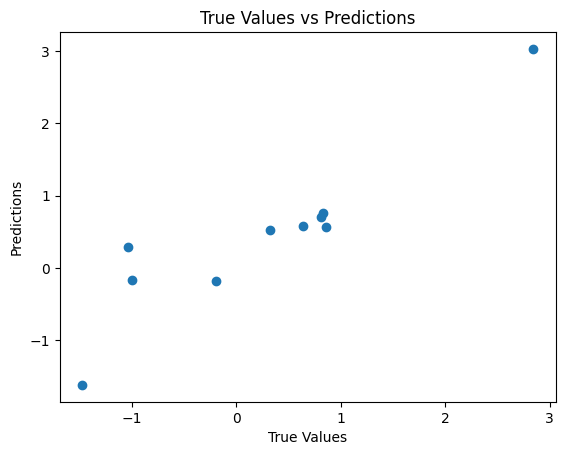

In [10]:
# Step 8: Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()